In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"D:\ml\kaggle datasets\titanic\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df_atb = df.drop("Survived",axis = 1)

In [10]:
df_labels = df.iloc[:,1]

In [11]:
df_labels.shape

(891,)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits =1,test_size = 0.2,random_state = 42)
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [14]:
for train_index,test_index in split.split(df_atb,df_labels):
    X_train = df_atb.loc[train_index]
    y_train = df_labels.loc[train_index]
    X_test = df_atb.loc[test_index]
    y_test = df_labels.loc[test_index]

In [15]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((712, 11), (712,), (179, 11), (179,))

In [16]:
y_train = pd.DataFrame(y_train)

In [17]:
y_train.shape

(712, 1)

In [18]:
X_train["index"] = np.arange(712)
X_train.set_index("index",inplace = True)
y_train["index"] = np.arange(712)
y_train.set_index("index",inplace = True)

In [19]:
X_train,y_train

(       PassengerId  Pclass                                           Name  \
 index                                                                       
 0              693       3                                   Lam, Mr. Ali   
 1              482       2               Frost, Mr. Anthony Wood "Archie"   
 2              528       1                             Farthing, Mr. John   
 3              856       3                     Aks, Mrs. Sam (Leah Rosen)   
 4              802       2    Collyer, Mrs. Harvey (Charlotte Annie Tate)   
 ...            ...     ...                                            ...   
 707            360       3              Mockler, Miss. Helen Mary "Ellie"   
 708            259       1                               Ward, Miss. Anna   
 709            737       3        Ford, Mrs. Edward (Margaret Ann Watson)   
 710            463       1                              Gee, Mr. Arthur H   
 711            508       1  Bradley, Mr. George ("George Arthur

In [20]:
from sklearn.model_selection import ShuffleSplit

In [21]:
ssplit = ShuffleSplit(n_splits = 1, random_state = 42,test_size = 0.15)
ssplit

ShuffleSplit(n_splits=1, random_state=42, test_size=0.15, train_size=None)

In [22]:
for i,j in ssplit.split(X_train,y_train):
    X_org = X_train.loc[i]
    y_org = y_train.loc[i]
    X_val = X_train.loc[j]
    y_val = y_train.loc[j]

In [23]:
X_org.shape,X_val.shape

((605, 11), (107, 11))

In [24]:
X_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 318 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  605 non-null    int64  
 1   Pclass       605 non-null    int64  
 2   Name         605 non-null    object 
 3   Sex          605 non-null    object 
 4   Age          490 non-null    float64
 5   SibSp        605 non-null    int64  
 6   Parch        605 non-null    int64  
 7   Ticket       605 non-null    object 
 8   Fare         605 non-null    float64
 9   Cabin        139 non-null    object 
 10  Embarked     603 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 56.7+ KB


In [25]:
X_org

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
index,,,,,,,,,,,
318,489,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
324,48,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
60,652,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
490,77,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
30,740,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
71,694,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
106,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
270,109,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S


In [26]:
corr_matrix = df.corr()

In [27]:
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [28]:
titanic = pd.merge(X_org,y_org,on = "index")

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 318 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  605 non-null    int64  
 1   Pclass       605 non-null    int64  
 2   Name         605 non-null    object 
 3   Sex          605 non-null    object 
 4   Age          490 non-null    float64
 5   SibSp        605 non-null    int64  
 6   Parch        605 non-null    int64  
 7   Ticket       605 non-null    object 
 8   Fare         605 non-null    float64
 9   Cabin        139 non-null    object 
 10  Embarked     603 non-null    object 
 11  Survived     605 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 61.4+ KB


In [30]:
corr_matrix = titanic.corr()

In [31]:
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.296914
Parch          0.075765
PassengerId    0.043325
SibSp         -0.020544
Age           -0.079107
Pclass        -0.343101
Name: Survived, dtype: float64

In [32]:
titanic["SibParch"] = titanic["SibSp"] + titanic["Parch"]
titanic["classAge"] = titanic["Age"]/titanic["Pclass"]
titanic["Fage"] = titanic["Parch"]/titanic["Fare"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A6DCC0DC8>,
      dtype=object)

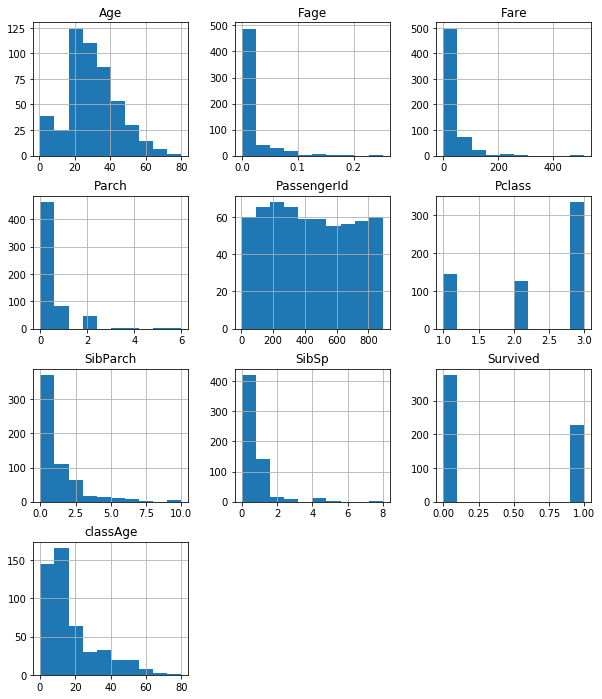

In [33]:
titanic.hist(bins = 10,figsize = (10,12))

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 318 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  605 non-null    int64  
 1   Pclass       605 non-null    int64  
 2   Name         605 non-null    object 
 3   Sex          605 non-null    object 
 4   Age          490 non-null    float64
 5   SibSp        605 non-null    int64  
 6   Parch        605 non-null    int64  
 7   Ticket       605 non-null    object 
 8   Fare         605 non-null    float64
 9   Cabin        139 non-null    object 
 10  Embarked     603 non-null    object 
 11  Survived     605 non-null    int64  
 12  SibParch     605 non-null    int64  
 13  classAge     490 non-null    float64
 14  Fage         594 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 75.6+ KB


In [35]:
X_num_atb = titanic.iloc[:,[1,4,6,8,13,14]]

In [36]:
X_num_cat = titanic.iloc[:,[3,10]]

In [37]:
X_num_atb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 318 to 102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    605 non-null    int64  
 1   Age       490 non-null    float64
 2   Parch     605 non-null    int64  
 3   Fare      605 non-null    float64
 4   classAge  490 non-null    float64
 5   Fage      594 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 33.1 KB


In [38]:
from sklearn.impute import KNNImputer

In [39]:
imputer = KNNImputer(n_neighbors = 5)

In [40]:
imputer

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [41]:
X_num = imputer.fit_transform(X_num_atb)

In [42]:
X_num = pd.DataFrame(X_num, columns = X_num_atb.columns)

In [43]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    605 non-null    float64
 1   Age       605 non-null    float64
 2   Parch     605 non-null    float64
 3   Fare      605 non-null    float64
 4   classAge  605 non-null    float64
 5   Fage      605 non-null    float64
dtypes: float64(6)
memory usage: 28.5 KB


In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

In [45]:
random_set = X_org.copy()

In [209]:
age,pclass,parch,fare = 4,1,6,8
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
            return self # nothing else to do
    def transform(self, X, y=None):

        if self.add_bedrooms_per_room:
            classAge = X[:,age]/X[:,pclass]
            return np.c_[X,classAge]
        else:
            return X

In [48]:
housing_extra_attribs.shape

(605, 13)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.pipeline import Pipeline

In [211]:
num_pipeline = Pipeline([("impuetr", KNNImputer(n_neighbors =5 )), ("scaling", StandardScaler()),
                         ('attbadder', CombinedAttributesAdder())])

In [212]:
X_num_atb

,Pclass,Age,Parch,Fare,classAge,Fage
index,,,,,,
318,3,30.0,0,8.0500,10.000000,0.000000
324,3,NaN,0,7.7500,NaN,0.000000
60,2,18.0,1,23.0000,9.000000,0.043478
490,3,NaN,0,7.8958,NaN,0.000000
30,3,NaN,0,7.8958,NaN,0.000000
...,...,...,...,...,...,...
71,3,25.0,0,7.2250,8.333333,0.000000
106,3,NaN,0,7.7500,NaN,0.000000
270,3,38.0,0,7.8958,12.666667,0.000000


In [213]:
case_test = num_pipeline.fit_transform(X_num_atb)

In [214]:
X_num_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 318 to 102
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       605 non-null    object
 1   Embarked  603 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [55]:
from sklearn.impute import SimpleImputer

In [56]:
cat_impute = SimpleImputer(strategy = "most_frequent")

In [57]:
X_cat_prep = cat_impute.fit_transform(X_num_cat)
X_cat_prep = pd.DataFrame(X_cat_prep, columns = X_num_cat.columns)

In [58]:
X_cat_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       605 non-null    object
 1   Embarked  605 non-null    object
dtypes: object(2)
memory usage: 9.6+ KB


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
ohe = OneHotEncoder()

In [61]:
X_cat_prepared = ohe.fit_transform(X_cat_prep).toarray()

In [62]:
X_cat_prepared

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
cat_pipeline = Pipeline([('impute',SimpleImputer(strategy = "most_frequent")), ("one hot encoder", OneHotEncoder())])

In [65]:
new_test = cat_pipeline.fit_transform(X_num_cat)

In [66]:
new_test

<605x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1210 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.compose import ColumnTransformer

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
num_attributes = ["Pclass", "Age","Parch","Fare","PassengerId"]

In [70]:
num_attributes

['Pclass', 'Age', 'Parch', 'Fare', 'PassengerId']

In [71]:
cat_attributes = ["Sex", "Embarked"]

In [72]:
cat_attributes

['Sex', 'Embarked']

In [194]:
X_org.shape,X_train.shape

((605, 11), (712, 11))

In [215]:
full_pipeline = ColumnTransformer([("num attbs",num_pipeline,num_attributes),
                                   ("cat attbs",cat_pipeline,cat_attributes)])

In [216]:
X_train_org = full_pipeline.fit_transform(X_org)

In [205]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
index,,,,,,,,,,,
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
707,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
708,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
709,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S


In [217]:
X_train_pp = full_pipeline.fit_transform(X_train)

In [207]:
X_train_org.shape,y_org.shape

((605, 12), (605, 1))

In [76]:
xd = pd.DataFrame(X_train_org)

In [77]:
X_org_set = xd.drop(5,axis = 1)

In [78]:
X_org_set = X_org_set.drop(6,axis = 1)

In [79]:
X_org_set = X_org_set.drop(10,axis = 1)

In [80]:
y_org

,Survived
index,
318,0
324,1
60,1
490,0
30,0
...,...
71,0
106,0
270,0


In [81]:
y_train_org = y_org.iloc[:,0].values

In [82]:
y_train_org = y_train_org.reshape(-1,1)

In [83]:
y_train_org.shape

(605, 1)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression(C = 1, penalty = 'l2',random_state = 42)
lr

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
cross_val_score(lr, X_org_set, y_train_org, cv=3, scoring="accuracy")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.74752475, 0.77722772, 0.85572139])

In [88]:
y_train_org.shape

(605, 1)

In [89]:
lr

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
param_grid = [{'C': np.arange(10), 'max_iter':[100,200,300,400,500]}]

In [92]:
random_search = RandomizedSearchCV(lr,param_grid,cv = 3,scoring = 'accuracy', return_train_score = True)

In [93]:
random_search.fit(X_org_set,y_train_org)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'C': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                         'max_iter': [100, 200, 300, 400,
                                                      500]}],
                   pre_dispatch='2*n_jobs', random_state=None, r

In [94]:
random_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
lr_final = random_search.best_estimator_

In [96]:
cross_val_score(lr_final, X_org_set, y_train_org, cv=5, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.72727273, 0.76859504, 0.7768595 , 0.84297521, 0.90909091])

In [97]:
from sklearn.svm import SVC

In [98]:
sv = SVC(C = 1,kernel = 'rbf', gamma = 1,probability = True)
sv

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
cross_val_score(sv, X_org_set, y_train_org, cv=5, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.76033058, 0.80165289, 0.73553719, 0.83471074, 0.84297521])

In [103]:
param_grid_svc = [{'kernel':['rbf'],'C': [0.001,0.01,0.1,1,3,7], 'cache_size':[100,200,300,400,500],'gamma':[0.001,0.01,0.1,1,2,3,4,]}]

In [104]:
random_search = RandomizedSearchCV(sv,param_grid_svc,cv = 5,scoring = 'accuracy', return_train_score = True)

In [105]:
random_search.fit(X_org_set,y_train_org)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma=1, kernel='rbf', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 3, 7],
                                         'cache_size': [100, 200, 300, 400,
                                                        500],
                                         'gamma': [0.001, 0.01, 0.1, 1, 2, 3,
                                                   4],
                                         'kernel': ['rbf']}],
                   pre_dispatch='2*n_jobs', random_state=None, re

In [107]:
sv_final = random_search.best_estimator_

In [108]:
sv_final

SVC(C=7, break_ties=False, cache_size=100, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rnd_clf = RandomForestClassifier(bootstrap = True,max_depth = 12,max_leaf_nodes = None,min_samples_leaf = 10,
                                 min_samples_split = 8)
rnd_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
rnd_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [151]:
cross_val_score(rnd_clf, X_org_set, y_train_org, cv=5, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

array([0.73553719, 0.76033058, 0.80165289, 0.82644628, 0.91735537])

In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [156]:
ada_bst = AdaBoostClassifier()

In [157]:
ada_bst

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [164]:
param_grid = [{'learning_rate':[0.01,0.1,1,1.5,2,5],'n_estimators':[20,40,60,80,100]}]

In [167]:
cross_val_score(ada_bst, X_org_set, y_train_org, cv=5, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.72727273, 0.75206612, 0.79338843, 0.82644628, 0.82644628])

In [172]:
ada_bst = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [173]:
cross_val_score(ada_bst, X_org_set, y_train_org, cv=5, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.73553719, 0.76033058, 0.76033058, 0.83471074, 0.84297521])

In [176]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()

In [178]:
cross_val_score(gbrt, X_org_set, y_train_org, cv=5, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

array([0.78512397, 0.81818182, 0.79338843, 0.84297521, 0.87603306])

In [180]:
from sklearn.ensemble import VotingClassifier

In [181]:
vot_clf = VotingClassifier([('lr',lr_final),('svc',sv_final),('rnd for',rnd_clf),('adaboost',ada_bst),('gd boost',gbrt)])

In [182]:
X_train,y_train

(       PassengerId  Pclass                                           Name  \
 index                                                                       
 0              693       3                                   Lam, Mr. Ali   
 1              482       2               Frost, Mr. Anthony Wood "Archie"   
 2              528       1                             Farthing, Mr. John   
 3              856       3                     Aks, Mrs. Sam (Leah Rosen)   
 4              802       2    Collyer, Mrs. Harvey (Charlotte Annie Tate)   
 ...            ...     ...                                            ...   
 707            360       3              Mockler, Miss. Helen Mary "Ellie"   
 708            259       1                               Ward, Miss. Anna   
 709            737       3        Ford, Mrs. Edward (Margaret Ann Watson)   
 710            463       1                              Gee, Mr. Arthur H   
 711            508       1  Bradley, Mr. George ("George Arthur

In [191]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 86.8+ KB


In [219]:
xtrain = pd.DataFrame(X_train_pp)

In [221]:
xtrain.drop(10,axis =1,inplace = True)

In [225]:
xtrain

,0,1,2,3,4,5,6,7,8,9
0,0.829568,0.087896,-0.466183,0.513812,0.966222,10.992827,0.0,1.0,0.0,0.0
1,-0.370945,0.674332,-0.466183,-0.662563,0.146119,0.216687,0.0,1.0,0.0,0.0
2,-1.571457,0.223227,-0.466183,3.955399,0.324909,1.455509,0.0,1.0,0.0,0.0
3,0.829568,-0.889497,0.727782,-0.467874,1.599762,-1.798501,1.0,0.0,0.0,0.0
4,-0.370945,0.087896,0.727782,-0.115977,1.389877,15.812805,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
707,0.829568,-0.047436,-0.466183,-0.498500,-0.328064,6.915983,1.0,0.0,0.0,1.0
708,-1.571457,0.388632,-0.466183,10.005329,-0.720626,-1.854262,1.0,0.0,1.0,0.0
709,0.829568,1.366025,3.115713,0.053205,1.137239,0.832517,1.0,0.0,0.0,0.0
710,-1.571457,1.290841,-0.466183,0.139097,0.072271,0.055987,0.0,1.0,0.0,0.0


In [226]:
y_train

,Survived
index,
0,1
1,0
2,0
3,1
4,1
...,...
707,1
708,1
709,0


In [228]:
cross_val_score(vot_clf, xtrain, y_train, cv=5, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([0.82517483, 0.74825175, 0.82394366, 0.83098592, 0.78873239])

In [230]:
vot_clf.fit(xtrain,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=300,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=7, break_ties=False, cache_size=100,
                                  class_weight=None, coef0=0.0,
                                  decisio...
                                                         max_leaf_nodes=Non

In [231]:
y_pred = vot_clf.predict(xtrain)

In [232]:
from sklearn.metrics import confusion_matrix

In [233]:
cm = confusion_matrix(y_train,y_pred)

In [234]:
cm

array([[421,  18],
       [ 48, 225]], dtype=int64)

In [235]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [237]:
precision_score(y_train,y_pred),recall_score(y_train,y_pred),f1_score(y_train,y_pred)

(0.9259259259259259, 0.8241758241758241, 0.872093023255814)

In [238]:
from sklearn.metrics import precision_recall_curve

In [239]:
precisions,recalls,thresholds = precision_recall_curve(y_train,y_pred)

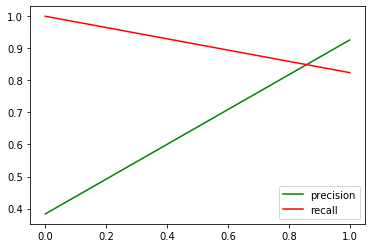

In [240]:
plt.plot(thresholds,precisions[:-1],color ='green',label = 'precision')
plt.plot(thresholds,recalls[:-1],color ='red',label = 'recall')
plt.legend()

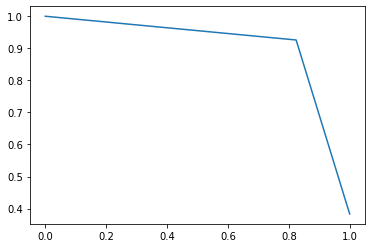

In [241]:
plt.plot(recalls,precisions)

In [243]:
from sklearn.metrics import roc_curve

In [245]:
fpr,tpr,thresholds = roc_curve(y_train,y_pred)

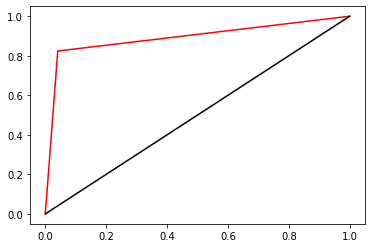

In [246]:
plt.plot(fpr,tpr,label = 'curve',color = 'red')
plt.plot([0,1],[0,1],color = 'black')

In [248]:
from sklearn.metrics import roc_auc_score

In [249]:
score = roc_auc_score(y_train,y_pred)

In [250]:
score

0.8915867731357481

In [283]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [254]:
X_tst_pp = pd.DataFrame(X_test_prepared)

In [256]:
X_tst_pp.drop(10,axis = 1,inplace = True)

In [257]:
X_tst_pp

,0,1,2,3,4,5,6,7,8,9
0,0.818879,-0.368410,-0.522951,-0.172088,0.442578,-1.201319,0.0,1.0,0.0,0.0
1,0.818879,1.145488,0.986859,-0.316645,-1.134452,-0.990366,0.0,1.0,0.0,0.0
2,0.818879,-0.519800,-0.522951,-0.476017,0.395851,-0.761545,0.0,1.0,1.0,0.0
3,0.818879,0.918403,-0.522951,-0.352411,1.591279,1.732659,0.0,1.0,0.0,0.0
4,0.818879,0.645901,-0.522951,-0.327420,-0.819046,-1.268067,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
174,-0.363212,-0.292715,0.986859,-0.138867,1.669157,-5.702327,1.0,0.0,0.0,0.0
175,0.818879,-0.671189,-0.522951,-0.464718,-1.403132,2.090515,0.0,1.0,0.0,0.0
176,-0.363212,-0.065630,-0.522951,-0.417207,1.680839,-25.610666,0.0,1.0,0.0,0.0
177,-0.363212,-0.444105,-0.522951,-0.358096,0.084339,-0.189908,1.0,0.0,1.0,0.0


In [258]:
y_pred = vot_clf.predict(X_tst_pp)

In [260]:
cmt = confusion_matrix(y_test,y_pred)

In [261]:
cmt

array([[99, 11],
       [28, 41]], dtype=int64)

In [264]:
precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.7884615384615384, 0.5942028985507246, 0.6776859504132232)

In [266]:
from sklearn.metrics import accuracy_score

In [267]:
accuracy_score(y_test,y_pred)

0.7821229050279329

In [268]:
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred)

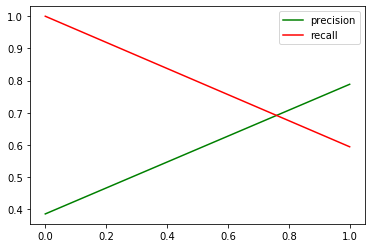

In [270]:
plt.plot(thresholds,precisions[:-1],color ='green',label = 'precision')
plt.plot(thresholds,recalls[:-1],color ='red',label = 'recall')
plt.legend()

In [276]:
df_tst = pd.read_csv(r"D:\ml\kaggle datasets\titanic\test.csv")

In [294]:
df_tst

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [284]:
x_tst_final = full_pipeline.fit_transform(df_tst)

In [286]:
X_final = pd.DataFrame(x_tst_final)

In [288]:
X_final.drop(10,axis =1,inplace = True)

In [289]:
X_final

,0,1,2,3,4,5,6,7,8,9
0,0.873482,0.382263,-0.400248,-0.499693,-1.727912,-4.520223,0.0,1.0,0.0,1.0
1,0.873482,1.348185,-0.400248,-0.514553,-1.719625,-1.275511,1.0,0.0,0.0,0.0
2,-0.315819,2.507293,-0.400248,-0.466390,-1.711337,-0.682544,0.0,1.0,0.0,1.0
3,0.873482,-0.197291,-0.400248,-0.484759,-1.703050,8.632165,0.0,1.0,0.0,0.0
4,0.873482,-0.583660,0.619896,-0.419796,-1.694763,2.903680,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,-0.545023,-0.400248,-0.495736,1.694763,-3.109523,0.0,1.0,0.0,0.0
414,-1.505120,0.729995,-0.400248,1.311584,1.703050,2.332962,1.0,0.0,1.0,0.0
415,0.873482,0.691358,-0.400248,-0.510073,1.711337,2.475328,0.0,1.0,0.0,0.0
416,0.873482,-0.545023,-0.400248,-0.495736,1.719625,-3.155139,0.0,1.0,0.0,0.0


In [290]:
y_predict = vot_clf.predict(X_final)

In [304]:
submission_scores = pd.DataFrame(y_predict)

In [298]:
submission_scores['PassengerId'] = df_tst['PassengerId']

In [311]:
my_submission = pd.DataFrame(submission_scores,columns = ['Survived'])

In [313]:
my_submission['Survived'] = pd.DataFrame(y_predict)

In [315]:
my_submission['PassengerId'] = df_tst['PassengerId']

In [318]:
my_submission

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [319]:
my_submission.to_csv('submission.csv',index = False)